In [9]:
import pandas
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from pathlib import Path
import numpy as np
import os
os.chdir("..") 
print("Current directory:", os.getcwd())


Current directory: /home/nono/hunt-cry-ai


In [11]:
df = pd.read_csv("data/labels.csv")
print(f"Total clips: {len(df)}")
print(f"Distribution:\n{df['class'].value_counts()}")

file_path = df.loc[0, 'filepath']          
full_path = f"data/{file_path}"
print("Full path:", full_path)

df.head()


Total clips: 23
Distribution:
class
kill        15
headshot     6
injured      2
Name: count, dtype: int64
Full path: data/raw/kill/bow_man_kill_01.wav


,filepath,class,source,duration_sec
0,raw/kill/bow_man_kill_01.wav,kill,Rexnor_VOD,1.8
1,raw/kill/bow_man_kill_02.wav,kill,Rexnor_VOD,1.9
2,raw/kill/bow_man_kill_03.wav,kill,Rexnor_VOD,1.7
3,raw/kill/bow_man_kill_04.wav,kill,Rexnor_VOD,2.0
4,raw/kill/bow_man_kill_05.wav,kill,Rexnor_VOD,1.8


ModuleNotFoundError: No module named 'src'

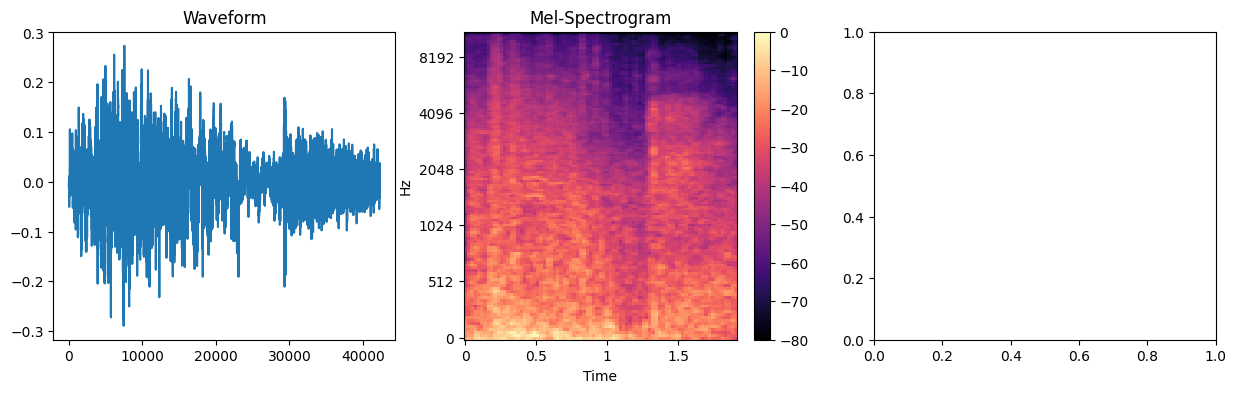

In [ ]:
file = "data/raw/kill/dark_satchel_man_kill_01.wav"
y, sr = librosa.load(file, sr=22050, duration=2.0)

plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.plot(y)
plt.title("Waveform")

plt.subplot(1,3,2)
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel-Spectrogram")
plt.colorbar()

plt.subplot(1,3,3)
from src.audio import audio_to_mel 
tensor = audio_to_mel(file)
plt.imshow(tensor.squeeze().numpy(), aspect='auto')
plt.title("Tensor pour CNN")
plt.show()